Title: Deep Learning-Based Malaria Image Classification Using Convolutional Neural Networks

This project aims to detect malaria using a deep learning model implemented in TensorFlow. The model is based on a modified CNN architecture and is trained on a dataset of malaria images.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt


Download the Dataset

In [2]:
ds, info = tfds.load('malaria', split='train', with_info=True)

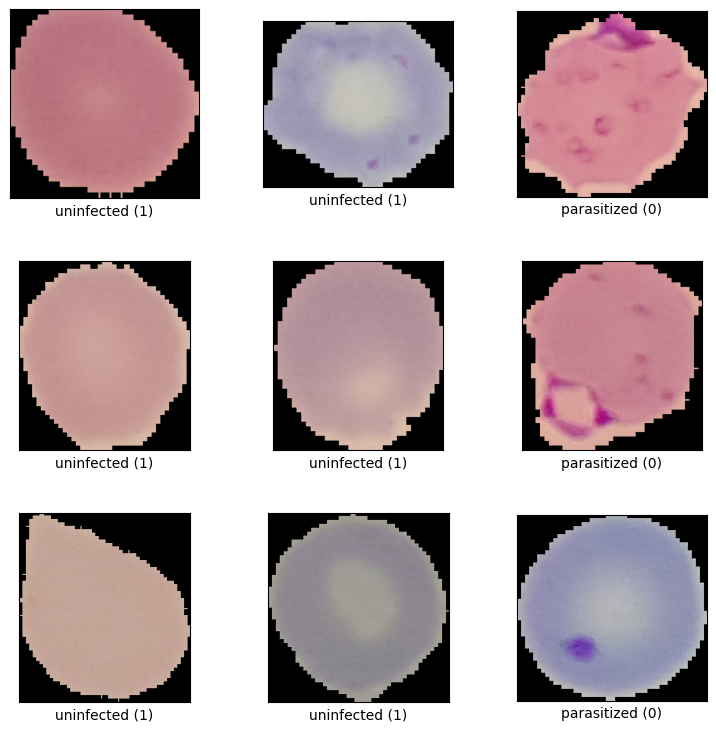

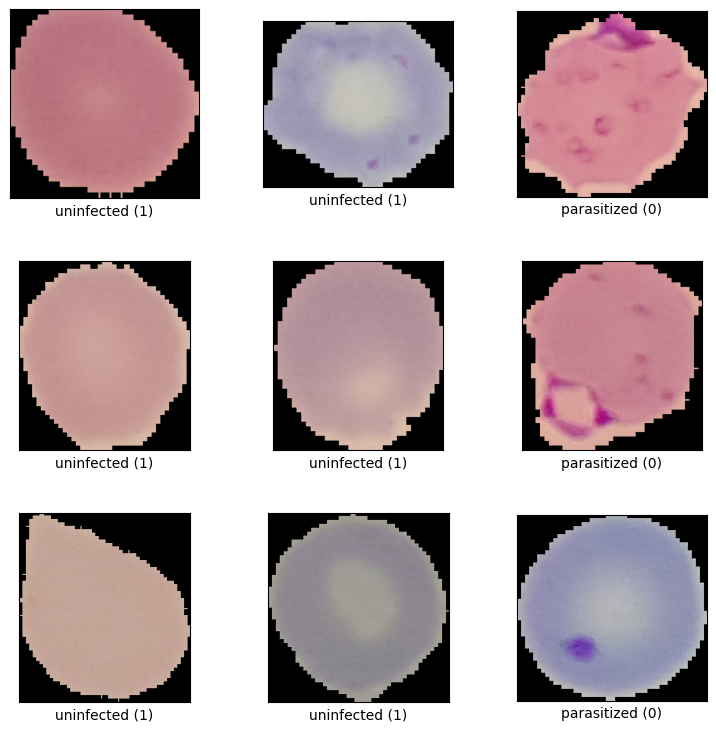

In [3]:
tfds.visualization.show_examples(ds, info)

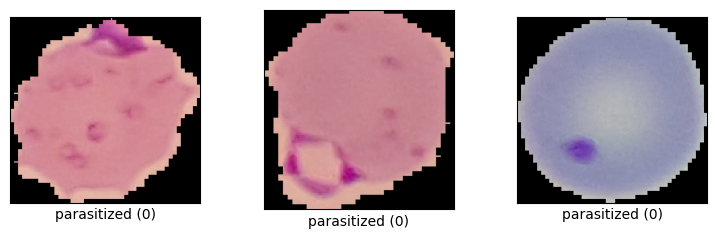

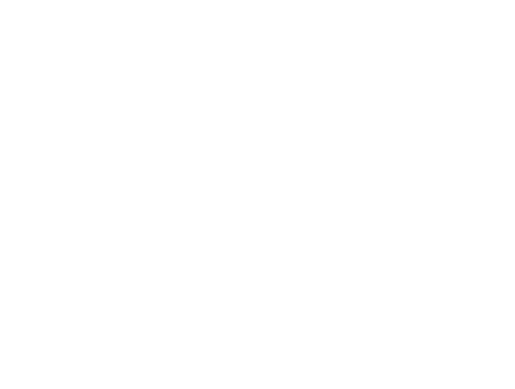

In [38]:
# Filter the dataset to get only uninfected examples
uninfected_ds = ds.filter(lambda x: x['label'] == 0)

# Plot three examples of uninfected images
fig = tfds.visualization.show_examples(uninfected_ds, info, rows=1, cols=3)
plt.axis("off")
plt.show()

In [4]:
train_images = []
train_labels = []

for example in ds:
    train_images.append(example['image'].numpy())
    train_labels.append(example['label'].numpy())

In [5]:

train_images = np.array(train_images)
train_labels = np.array(train_labels)

C:\Users\USER\AppData\Local\Temp\ipykernel_3832\3980941683.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_images = np.array(train_images)


In [6]:
print("Image:")
print(train_images[0])
print("Label: " + str(train_labels[0]))

Image:
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Label: 1


In [7]:
images_flattened = [x.flatten().astype('float64') for x in train_images]

In [8]:
img_lengths = []

for img in images_flattened:
    img_lengths.append(len(img))

In [9]:
img_lengths = np.array(img_lengths)

In [10]:
uninfected_lengths = img_lengths[train_labels == 1]
parasitized_lengths = img_lengths[train_labels == 0]

In [11]:
scipy.stats.describe(uninfected_lengths)


DescribeResult(nobs=13779, minmax=(8526, 141240), mean=52369.86022207708, variance=169924844.47051734, skewness=0.9253580548689546, kurtosis=2.950213992326833)

In [12]:
scipy.stats.describe(parasitized_lengths)

DescribeResult(nobs=13779, minmax=(6600, 371280), mean=54644.67798824298, variance=271685467.8317778, skewness=2.7492421162518896, kurtosis=26.067885001336347)

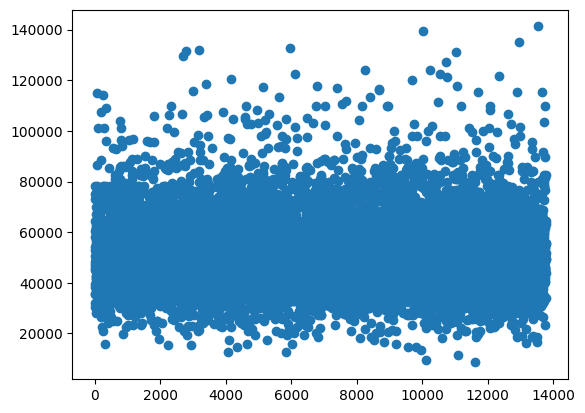

In [13]:
plt.scatter(np.arange(len(uninfected_lengths)), uninfected_lengths)

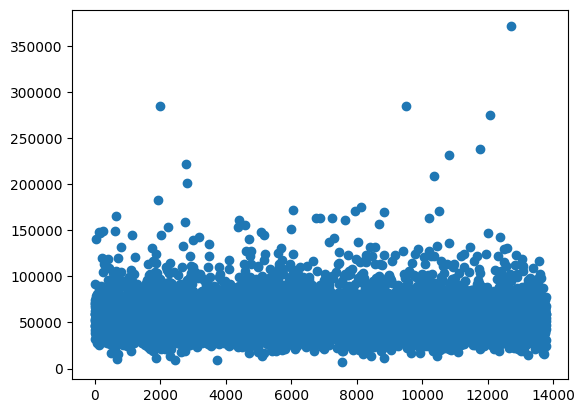

In [15]:
plt.scatter(np.arange(len(parasitized_lengths)), parasitized_lengths)

In [16]:
np.unique(uninfected_lengths)

array([  8526,   9408,  11658,  12540,  12810,  13440,  14457,  15330,
        15879,  15960,  15987,  16356,  16590,  16644,  17220,  17301,
        17400,  17850,  18012,  18291,  18615,  18696,  18723,  18894,
        18966,  19272,  19380,  19434,  19740,  19776,  20064,  20145,
        20172,  20586,  20748,  20856,  20910,  21243,  21432,  21567,
        21648,  21675,  22080,  22116,  22278,  22386,  22440,  22557,
        22989,  23124,  23205,  23232,  23700,  23862,  23970,  24024,
        24150,  24168,  24600,  24735,  24816,  24852,  25338,  25500,
        25536,  25608,  25662,  26076,  26220,  26265,  26400,  26481,
        26508,  26814,  27192,  27300,  27354,  27552,  27588,  27795,
        27984,  28119,  28200,  28227,  28290,  28560,  28776,  28938,
        28956,  29028,  29046,  29100,  29325,  29568,  29757,  29766,
        29892,  29973,  30000,  30090,  30360,  30450,  30504,  30576,
        30738,  30810,  30846,  30900,  31242,  31395,  31584,  31620,
      

In [17]:
np.unique(parasitized_lengths)

array([  6600,   9048,   9660,  10902,  11136,  11163,  13224,  14016,
        14070,  14592,  15330,  15879,  15960,  16590,  16644,  17202,
        17220,  17301,  17850,  18012,  18615,  18696,  18723,  19110,
        19272,  19380,  19434,  19497,  20064,  20145,  20172,  20586,
        20748,  20856,  20910,  21243,  21567,  21648,  21675,  21900,
        22116,  22143,  22386,  22440,  22800,  22989,  23124,  23205,
        23214,  23232,  23700,  23862,  23871,  23970,  24024,  24411,
        24600,  24735,  24816,  24843,  24852,  25122,  25500,  25608,
        25662,  25833,  26076,  26220,  26265,  26400,  26481,  26508,
        26814,  27030,  27156,  27192,  27255,  27300,  27336,  27354,
        27795,  27966,  27984,  28119,  28200,  28227,  28272,  28290,
        28560,  28776,  28938,  29028,  29046,  29100,  29325,  29568,
        29757,  29766,  29892,  29973,  30000,  30090,  30360,  30504,
        30576,  30738,  30846,  30855,  30900,  31152,  31395,  31584,
      

In [58]:
BATCH_SIZE = 32
IMAGE_SIZE = [200, 200]



train_size = 2500
val_size = 750
test_size = 750

train_ds, val_ds, test_ds, del_ds = tfds.load('malaria',
                                              split=[
                                                  f'train[:{train_size}]',
                                                  f'train[{train_size}:{train_size+val_size}]',
                                                  f'train[{train_size+val_size}:{train_size+val_size+test_size}]',
                                                  f'train[{train_size+val_size+test_size}:]'
                                              ],
                                              shuffle_files=True,
                                              as_supervised=True)


In [59]:
NUM_TRAIN_IMAGES = tf.data.experimental.cardinality(train_ds).numpy()
print("Num training images: " + str(NUM_TRAIN_IMAGES))

NUM_VAL_IMAGES = tf.data.experimental.cardinality(val_ds).numpy()
print("Num validating images: " + str(NUM_VAL_IMAGES))

NUM_TEST_IMAGES = tf.data.experimental.cardinality(test_ds).numpy()
print("Num testing images: " + str(NUM_TEST_IMAGES))

Num training images: 2500
Num validating images: 750
Num testing images: 750


In [60]:
num_uninfected = 0
num_parasitized = 0

for image, label in train_ds:
    if label == 0:  # Assuming 0 represents uninfected and 1 represents parasitized
        num_uninfected += 1
    elif label == 1:
        num_parasitized += 1

print("Number of uninfected images in training set:", num_uninfected)
print("Number of parasitized images in training set:", num_parasitized)


Number of uninfected images in training set: 1223
Number of parasitized images in training set: 1277


In [61]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (103, 103, 3)
Label:  1


In [62]:
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

def pad(image,label):
  image,label = convert(image, label)
  image = tf.image.resize_with_crop_or_pad(image, 200, 200)
  return image,label

In [63]:
padded_train_ds = (
    train_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

padded_val_ds = (
    val_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

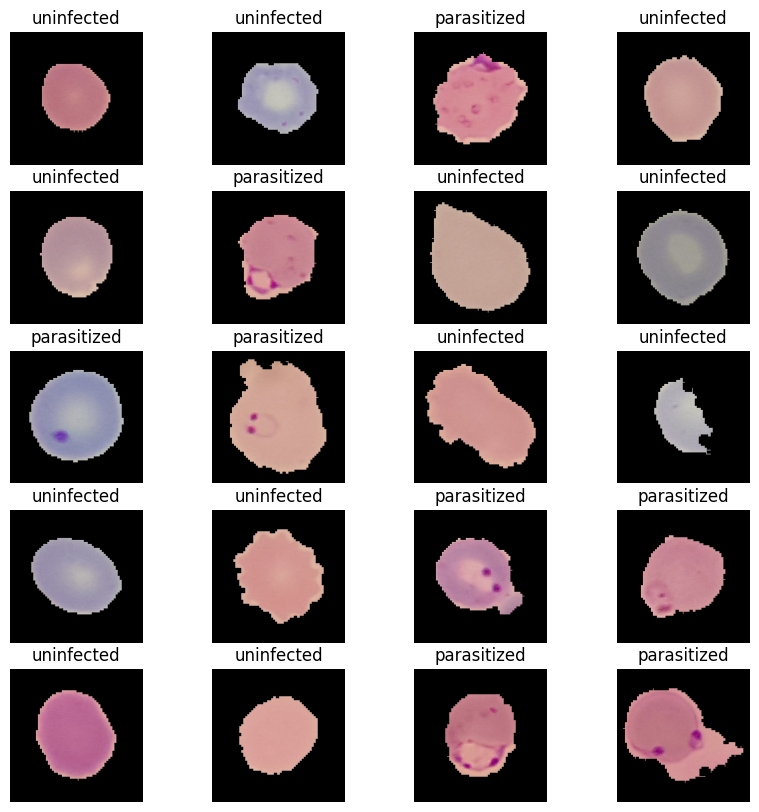

In [64]:
image_batch, label_batch = next(iter(padded_train_ds))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(20):
        ax = plt.subplot(5,4,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("uninfected")
        else:
            plt.title("parasitized")
        plt.axis("off")

show_batch(image_batch.numpy(), label_batch.numpy())

In [65]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [66]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

In [67]:
model = build_model()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=tf.keras.metrics.AUC(name='auc')
)

In [68]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("malaria_model.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                     restore_best_weights=True)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [69]:
history = model.fit(
    padded_train_ds, epochs=20,
    validation_data=padded_val_ds,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler] 
)

Epoch 1/20
79/79 [==============================] - 315s 4s/step - loss: 0.7375 - auc: 0.5983 - val_loss: 3.5922 - val_auc: 0.5000 - lr: 0.0100
Epoch 2/20
79/79 [==============================] - 240s 3s/step - loss: 0.6386 - auc: 0.6942 - val_loss: 1.1295 - val_auc: 0.4732 - lr: 0.0089
Epoch 3/20
79/79 [==============================] - 346s 4s/step - loss: 0.5016 - auc: 0.8368 - val_loss: 2.2106 - val_auc: 0.5629 - lr: 0.0079
Epoch 4/20
79/79 [==============================] - 202s 3s/step - loss: 0.3505 - auc: 0.9188 - val_loss: 0.8952 - val_auc: 0.5870 - lr: 0.0071
Epoch 5/20
79/79 [==============================] - 206s 3s/step - loss: 0.2468 - auc: 0.9532 - val_loss: 0.6267 - val_auc: 0.7705 - lr: 0.0063
Epoch 6/20
79/79 [==============================] - 204s 3s/step - loss: 0.2317 - auc: 0.9573 - val_loss: 0.2995 - val_auc: 0.9546 - lr: 0.0056
Epoch 7/20
79/79 [==============================] - 202s 3s/step - loss: 0.2157 - auc: 0.9641 - val_loss: 0.3718 - val_auc: 0.9688 - lr:

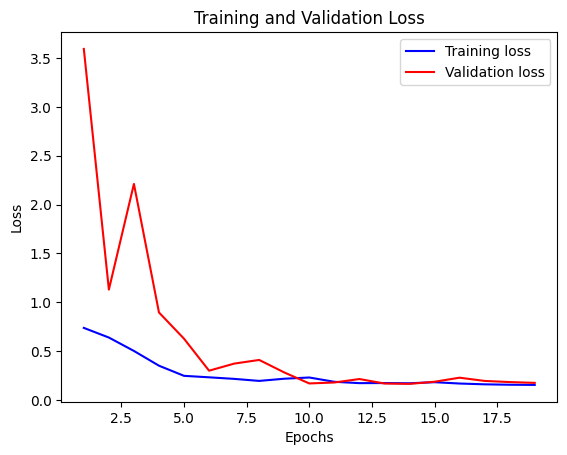

In [76]:
# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

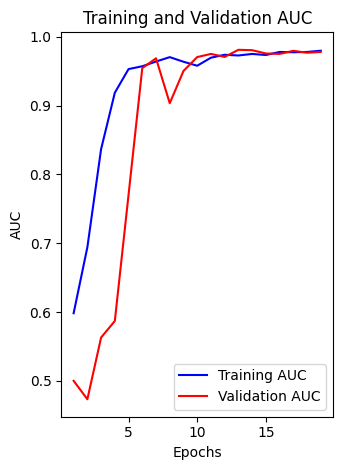

In [77]:
training_auc = history.history['auc']
validation_auc = history.history['val_auc']

# Plotting training and validation AUC
plt.subplot(1, 2, 2)
plt.plot(epochs, training_auc, 'b', label='Training AUC')
plt.plot(epochs, validation_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
padded_test_ds = (
     test_ds
    .cache()
    .map(pad)
    .batch(BATCH_SIZE)
) 

In [79]:
model.evaluate(padded_test_ds)

24/24 [==============================] - 17s 675ms/step - loss: 0.1600 - auc: 0.9824


[0.15998438000679016, 0.9824346303939819]

In [80]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 sequential_16 (Sequential)  (None, 50, 50, 32)        816       
                                                                 
 sequential_17 (Sequential)  (None, 25, 25, 64)        2656      
                                                                 
 sequential_18 (Sequential)  (None, 12, 12, 128)       9408      
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 128)       0         
                                                     

In [83]:
# Assuming 'model' is your trained model
model.save("malaria_model.h5")
